# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Técnicas Avançadas de Captura e Tratamento de Dados</span>

## <span style="color:blue">Avaliação Final - 2024</span>
**Luis Gustavo Nonato** e **Moacir Antonelli Ponti**<br>

**Cemeai - ICMC/USP São Carlos**

A avaliação vale 10 pontos e está dividida em duas partes, cada uma valendo 5.0 pontos caso as questões estejam respondidas da forma correta, totalizam 10 pontos.


<font color='red'>**ATENÇÃO:** Quando terminar de exame, você deve fazer um "upload" do notebook no _moodle_</font>.

# Parte 1



## Questão 1 (2.5 pontos)
O diretório `Documentos` (contido no arquivo  TACTD_AvaliacaoFinal_2024-Dados.zip) contém uma base de dados com 300 documentos textuais cujo conteúdo são notícias relacionadas a três assuntos diferentes, negócios (arquivos começando com "business"), comida (arquivos começando com "food") e medicina (arquivos começando com "medical"). Construa um DataFrame <font color='blue'>pandas</font> onde as colunas correspondem aos documentos e as linhas às palavras que aparecem nos documentos. Cada palavra contida nas linhas do DataFrame deve satisfazer:
- ser formada por dois ou mais caracteres do alfabeto (palavras com caracteres numéricos ou símbolos devem ser desconsideradas)
- não deve ser uma stopword (use a lista de stopwords do inglês)
- deve estar lexicamente normalizada
- ser convertida para caixa-baixa (lower-case)

As entradas do DataFrame devem ser binárias, ou seja, se a palavra que aparece na linha $i$ está presente no documento representado pela coluna $j$, então a posição $(i,j)$ do DataFrame deve conter o valor 1, sendo 0 caso contrário.

Imprima as três palavras que aparecem em mais documentos. Em quantos documentos tais palavras aparecem?

In [1]:
import glob
import os
import re
from collections import Counter

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing import image

# Download necessário dos pacotes do NLTK
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\feh_s\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\feh_s\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
files = glob.glob(r"C:\Users\feh_s\Desktop\MBA_data_science\2. Técnicas Avançadas de Captura e Tratamento de Dados 2024\Avaliação final\Documentos\*")

docs = {}
for fname in files:
    with open(fname,'r', encoding="utf8") as f:
        key = fname.split(os.sep)[-1]
        docs[key] = f.read() 
        
print(docs.keys())

dict_keys(['business_1.txt', 'business_10.txt', 'business_100.txt', 'business_11.txt', 'business_12.txt', 'business_13.txt', 'business_14.txt', 'business_15.txt', 'business_16.txt', 'business_17.txt', 'business_18.txt', 'business_19.txt', 'business_2.txt', 'business_20.txt', 'business_21.txt', 'business_22.txt', 'business_23.txt', 'business_24.txt', 'business_25.txt', 'business_26.txt', 'business_27.txt', 'business_28.txt', 'business_29.txt', 'business_3.txt', 'business_30.txt', 'business_31.txt', 'business_32.txt', 'business_33.txt', 'business_34.txt', 'business_35.txt', 'business_36.txt', 'business_37.txt', 'business_38.txt', 'business_39.txt', 'business_4.txt', 'business_40.txt', 'business_41.txt', 'business_42.txt', 'business_43.txt', 'business_44.txt', 'business_45.txt', 'business_46.txt', 'business_47.txt', 'business_48.txt', 'business_49.txt', 'business_5.txt', 'business_50.txt', 'business_51.txt', 'business_52.txt', 'business_53.txt', 'business_54.txt', 'business_55.txt', 'busi

In [3]:
words = ''
for k,s in docs.items():
    words = words+s

words = nltk.word_tokenize(words)

In [4]:
data = {}

stop_words = stopwords.words("english")
stop_words = set(stop_words)


stemmer = PorterStemmer()

for filename, contents in docs.items():
    
    # Separar por palavras
    words = nltk.word_tokenize(contents)
    
    # Remover caracteres especiais e deixar em minúsculo
    words_filtered = [
        word.lower() for word in words
        if len(word) > 1 and word.isalpha() 
    ]
    
    # Remover as stop words
    words_filtered = [
        word for word in words_filtered
        if word not in stop_words
    ]
    
    # Extrair os radicais
    words_stemmed = [
        stemmer.stem(word) for word in words_filtered
    ]
    
    data[filename] = words_stemmed

In [5]:
palavras_unicas = set(palavra for lista in data.values() for palavra in lista)

binario = {palavra: [0] * len(data) for palavra in palavras_unicas}

for coluna, palavras in data.items():
    for palavra in palavras:
        binario[palavra][list(data.keys()).index(coluna)] = 1

df = pd.DataFrame(binario, index=data.keys())

df.head()


,absent,creami,sharon,ethiopia,earnest,interven,reassur,significantli,dividend,baffl,...,interact,fact,slow,chain,warfarin,present,weather,monthli,plastic,untreat
business_1.txt,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
business_10.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
business_100.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
business_11.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
business_12.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.sum().sort_values(ascending=False).head(3)

also    123
year    110
said    109
dtype: int64

In [7]:
df[['also', 'year', 'said']][(df['also'] > 0) | (df['year'] > 0) | (df['said'] > 0)]

,also,year,said
business_1.txt,1,1,1
business_10.txt,1,0,1
business_100.txt,1,0,1
business_11.txt,0,1,1
business_12.txt,0,1,1
...,...,...,...
medical_645.txt,1,1,1
medical_646.txt,1,1,1
medical_691.txt,1,0,0
medical_694.txt,1,0,0


## Questão 2 (2.5 pontos)
Considere o DataFrame construído na questão 1.
- Remova do DataFrame as palavras que aparecem apenas em 1 documento e imprima quantas palavras foram removidas.
- Considerando cada coluna (documentos) do DataFrame resultante com um ponto em um espaço de alta dimensão, calcule as direções principais dos pontos.
- Faça o gráfico da curva das variâncias explicadas e veja como elas tendem a zero.
- Qual o número mínimo de direções principais necessárias para capturar 80% da variância explicada?
- Projete os pontos nas duas direções principais com maior variância e faça um "scatter plot" dos pontos projetados. Os pontos devem estar coloridos de acordo com o tipo de cada documento, ou seja, documentos correspondendo a negócios devem estar coloridos da mesma cor, o mesmo valendo para documentos correspondendo a comida e medicina, cada tipo com uma cor diferente.

### 2.1 Remova do DataFrame as palavras que aparecem apenas em 1 documento e imprima quantas palavras foram removidas.


In [8]:
drop_cols = [coluna for coluna in df.columns if df[coluna].sum() == 1]

In [9]:
len(df.columns)

7403

In [10]:
df = df.drop(columns=drop_cols)

len(df.columns)

3631

In [11]:
print(f"{7403-3631} colunas removidas")

3772 colunas removidas


### 2.2 Considerando cada coluna (documentos) do DataFrame resultante com um ponto em um espaço de alta dimensão, calcule as direções principais dos pontos.

In [12]:
docid = {}
for i,c in enumerate(df.index.values):
   if c not in docid:
      docid[c] = i


doc_class = [docid[c] for c in df.index.values]


X = df.values
# X = StandardScaler().fit_transform(X)

pca_obj = PCA()
Xpca = pca_obj.fit_transform(X)

# Aplicar PCA
pca = PCA().fit(Xpca)

Xpca


array([[-8.72099892e-01,  1.14891905e+00, -1.38128082e-01, ...,
         5.07440806e-03, -3.34093891e-15, -3.76539855e-17],
       [ 2.59575523e-01,  1.89988040e+00,  1.76307113e-01, ...,
        -3.57454960e-04, -3.34093891e-15, -3.76539855e-17],
       [ 1.12905014e-01,  1.89450596e+00,  6.80502177e-01, ...,
         3.25106964e-03, -3.34093891e-15, -3.76539855e-17],
       ...,
       [-1.01167791e+00, -6.34982128e-01, -1.10285595e+00, ...,
        -2.29079516e-03, -3.34093891e-15, -3.76539855e-17],
       [ 4.17248974e+00, -1.84543792e+00, -3.41514051e+00, ...,
         4.02079642e-03, -3.34093891e-15, -3.76539855e-17],
       [-1.14609131e+00, -3.63938955e-01, -1.09982780e+00, ...,
         1.95965863e-02, -3.34093891e-15, -3.76539855e-17]])

In [13]:




# # Calcular a variância explicada cumulativa
# variância_explicada_cumulativa = pca.explained_variance_ratio_.cumsum()

# # Encontrar o número mínimo de componentes para 80% de variância explicada
# n_componentes = (variância_explicada_cumulativa > 0.80).argmax() + 1

# print(f"Número mínimo de componentes principais para capturar 80% da variância: {n_componentes}")

### 2.3 Faça o gráfico da curva das variâncias explicadas e veja como elas tendem a zero.

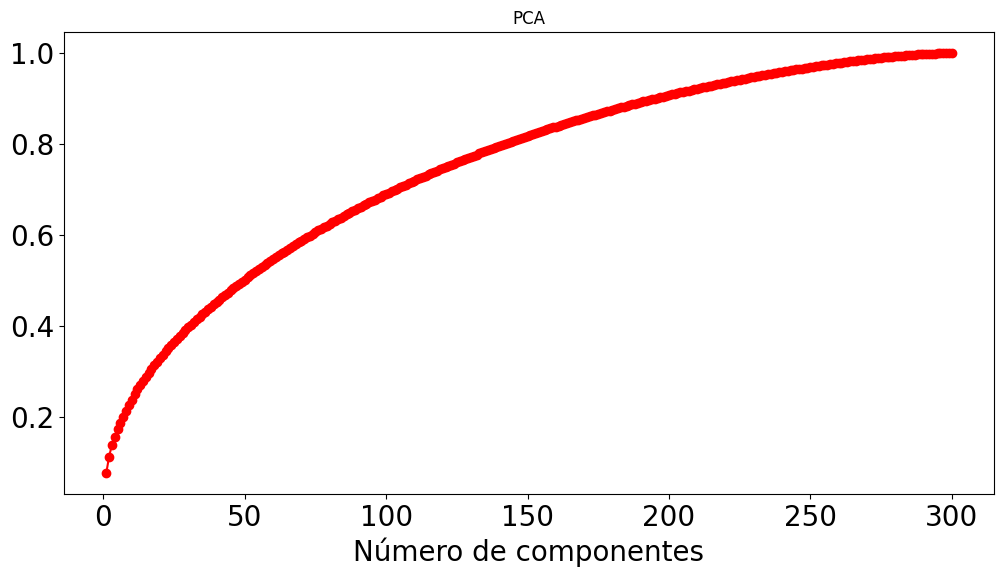

In [14]:
docid = {}
for i,c in enumerate(df.T.index.values):
   if c not in docid:
      docid[c] = i

doc_classT = [docid[c] for c in df.T.index.values]


XT = df.T.values
# X = StandardScaler().fit_transform(X)

pca_objT = PCA()
XpcaT = pca_objT.fit_transform(X)


# Aplicar PCA
pcaT = PCA().fit(Xpca)

plt.figure(figsize=(12,6))

ncompT = np.arange(1, np.shape(XT)[1]+1)


plt.title("PCA")
plt.plot(ncompT, np.cumsum(pcaT.explained_variance_ratio_), 'ro-')
plt.xlabel('Número de componentes', fontsize=20)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)

plt.show()

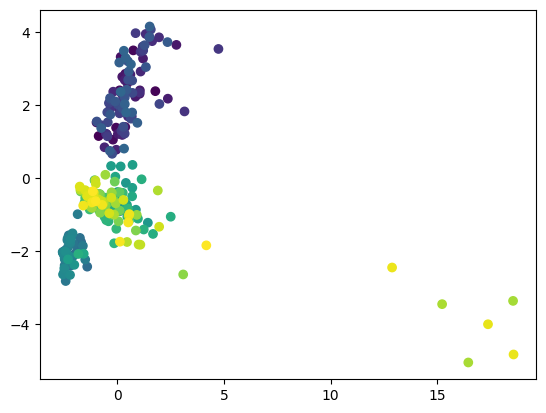

In [15]:
plt.scatter(Xpca[:,0],Xpca[:,1],c=doc_class)

plt.show()

### 2.4 Qual o número mínimo de direções principais necessárias para capturar 80% da variância explicada?

In [16]:
# Calcular a variância explicada cumulativa
variância_explicada_cumulativa = pca.explained_variance_ratio_.cumsum()

# Encontrar o número mínimo de componentes para 80% de variância explicada
n_componentes = (variância_explicada_cumulativa > 0.80).argmax() + 1

print(f"Número mínimo de componentes principais para capturar 80% da variância: {n_componentes}")

Número mínimo de componentes principais para capturar 80% da variância: 142


### 2.5 Projete os pontos nas duas direções principais com maior variância e faça um "scatter plot" dos pontos projetados. Os pontos devem estar coloridos de acordo com o tipo de cada documento, ou seja, documentos correspondendo a negócios devem estar coloridos da mesma cor, o mesmo valendo para documentos correspondendo a comida e medicina, cada tipo com uma cor diferente.

In [17]:
df.values.shape

(300, 3631)

In [18]:
pca.components_.shape

(300, 300)

In [19]:
X = df.values

pca_obj=PCA(svd_solver='full', n_components=2)
X_transformed = pca_obj.fit_transform(X)

In [20]:
df.index =  df.index.str.extract(r'^(.*?)(?=_)')

In [21]:
colors = ['red','green','blue']
unique_categories = list(set(df.index))
lista_de_strings = [tupla[0] for tupla in unique_categories]
color_map = {category: colors[i % len(colors)] for i, category in enumerate(lista_de_strings)}
color_map

{'medical': 'red', 'business': 'green', 'food': 'blue'}

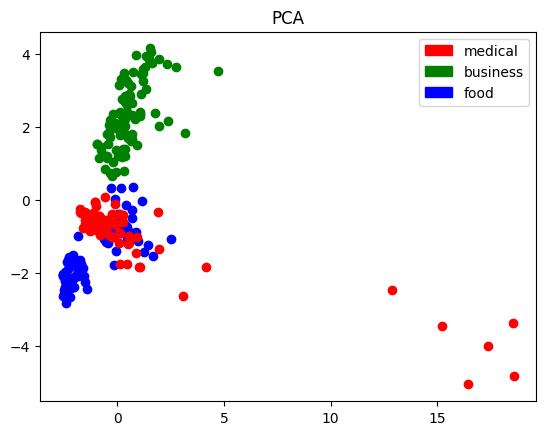

In [22]:
plt.title("PCA")
colors = ['red','green','blue']
unique_categories = list(set(df.index))
lista_de_strings = [tupla[0] for tupla in unique_categories]
color_map = {category: colors[i % len(colors)] for i, category in enumerate(lista_de_strings)}

legend_handles = [mpatches.Patch(color=color_map[category], label=category) for category in color_map]

for i in range(0, X_transformed.shape[0]):
    color = color_map[df.index[i][0]]
    plt.scatter(X_transformed[i][0], X_transformed[i][1], c=color)

plt.legend(handles=legend_handles)

plt.show()

---
# Parte 2

## Questão 3 (2.0 pontos)

Antes de começar, carregue o arquivo `siim-isic_2024.csv` (disponível no arquivo TACTD_AvaliacaoFinal_2024-Dados.zip) e armazene em um pandas DataFrame.


In [23]:
dataset = pd.read_csv("siim-isic_2024.csv")

#### a) Valores Faltantes (1 ponto)

Trate valores faltantes, da seguinte forma para as seguintes colunas:
1. "age_approx", preencha com a média dos valores relativos à coluna "sex" caso esse valor exista, ou com a média global caso "sex" esteja faltando. Converta o resultado para inteiro.
2. "diagnosis", preencha com a string `unknown`
3. "benign_malignant", remova as linhas com valores faltantes

Para colunas não mencionadas não realize nenhum tratamento.

Para cada item, exiba a quantidade de nulos/faltantes naquela coluna antes e depois do tratamento.

Ao final exiba o tamanho do dataset após todos os tratamentos

In [24]:
dataset.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant
0,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign
1,ISIC_0052212,IP_2842074,NaN,50.0,lower extremity,nevus,benign
2,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign
3,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign
4,ISIC_0074311,IP_2950485,female,40.0,lower extremity,unknown,benign


In [25]:
dataset['age_approx'].isnull().sum()

26

In [26]:
## 1 - age_approx
# dataset['age_approx'] = 
f_age_mean = dataset[dataset['sex'] == 'female']['age_approx'].mean()
m_age_mean = dataset[dataset['sex'] == 'male']['age_approx'].mean()
global_mean = dataset['age_approx'].mean()

print(f_age_mean, m_age_mean, global_mean)
dataset.groupby('sex').agg({'age_approx': 'mean'})

47.648211021154346 50.507001448575565 49.13594181088538


,age_approx
sex,
female,47.648211
male,50.507001


In [27]:
# Preenchendo os valores faltantes
dataset['age_approx'] = np.where(
    (dataset['age_approx'].isnull()) & (dataset['sex'] == 'female'),
    f_age_mean,
    np.where(
        (dataset['age_approx'].isnull()) & (dataset['sex'] == 'male'),
        m_age_mean,
        np.where(
            (dataset['age_approx'].isnull()) & (dataset['sex'].isnull()),
            global_mean,
            dataset['age_approx']
        )
    )
)

In [28]:
dataset['age_approx'].isnull().sum()


0

In [29]:
## 2 - diagnosis
dataset['diagnosis'].isnull().sum()

11

In [30]:
dataset['diagnosis'] = dataset['diagnosis'].fillna('unknown')

In [31]:
dataset[dataset['diagnosis'].isnull()]

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant


In [32]:
## 3 - benign_malignant
dataset.dropna(subset=['benign_malignant'], inplace=True)

In [33]:
dataset['benign_malignant'].isnull().sum()

0

#### b) Discretização e codificação de variáveis categóricas (1 ponto)

Codifique as seguintes variáveis categóricas, gerando novos atributos, para as seguintes colunas:

1. "age_approx": crie uma nova coluna chamada `age_range` discretizando as idades em 3 valores possíveis relativo aos invervalos e idades, agregando a nova coluna ao dataset existente:
    - 1 : entre a menor idade da coluna e 45 (inclusive)
    - 2 : entre 45 e 55 (inclusive)
    - 3 : entre 55 e a maior idade da coluna
    
2. "diagnosis": crie novas colunas utilizando one-hot-encoding, agregando as novas colunas ao dataset existente

Para a coluna `age_range` mostre a contagem de valores em cada intervalo discretizado.

Exiba uma amostra de 5 linhas das novas variáveis one-hot juntamente com a coluna `diagnosis`.

In [34]:
bins = [dataset['age_approx'].min(), 45, 55, dataset['age_approx'].max()]
print(bins)

faixas = ['Até 45 anos', '45-55 anos', 'Mais de 55 anos']

[10.0, 45, 55, 90.0]


In [35]:
## age_approx
dataset['age_range'] = pd.cut(dataset['age_approx'], bins=bins, labels=faixas, right=False)


In [36]:
## diagnosis
dataset['age_range'].value_counts().sort_index()

age_range
Até 45 anos        2666
45-55 anos         2070
Mais de 55 anos    3242
Name: count, dtype: int64

In [37]:
pd.get_dummies(dataset[['diagnosis', 'age_range']], columns=['diagnosis'], dtype=int).head()

,age_range,diagnosis_lentigo NOS,diagnosis_lichenoid keratosis,diagnosis_melanoma,diagnosis_nevus,diagnosis_seborrheic keratosis,diagnosis_solar lentigo,diagnosis_unknown
0,45-55 anos,0,0,0,0,0,0,1
1,45-55 anos,0,0,0,1,0,0,0
2,45-55 anos,0,0,0,0,0,0,1
3,Mais de 55 anos,0,0,0,0,0,0,1
4,Até 45 anos,0,0,0,0,0,0,1


## Questão 4 (3 pontos)

Considere as imagens dos pacientes conforme estão disponíveis dentro do diretório siim-isic-images em  TACTD_AvaliacaoFinal_2024-Dados.zip

Nessa questão faremos uma busca com base em uma imagem de consulta, retornando as imagens similares a esta, de forma a mostrar a um especialista e facilitar o seu diagnóstico. Para isso seguir os seguintes passos:
1. Carregar imagens utilizando a função disponível, armazenando também a lista com os nomes das imagens carregadas;
2. Montar uma rede neural com modelo pré-treinado DenseNet121 (ver [https://keras.io/api/applications/densenet/#densenet121-function]) e usá-la para extração dos embeddings das imagens;
3. Criar um dataframe no qual cada linha é uma imagem, e que as colunas sejam: o nome da imagem (apenas o nome sem o caminho), o embeddings da imagem, e o array da imagem;
4. Dado o nome da imagem para consulta, buscar e retornar as 3 imagens mais similares (excetuando a de consulta) com base na Distância Euclidiana entre os embeddings, exibindo posteriormente:
   - As 3 imagens encontradas,
   - Os dados/informações estruturadas relativas a essas 3 imagens: `sex`, `age_range`, `anatom_site_general_challenge` e `benign_malignant`.

Desenvolva seu código na ordem definida acima, usando ao menos uma célula (pode usar mais que uma) separada para cada um dos items (1 a 4).

Sempre que possível implemente funções para realizar as tarefas.

Use suas funções para mostrar o resultado utilizando como consulta a seguinte imagem:
- `ISIC_0189694.jpg`

In [38]:


def load_images_as_numpy(directory, image_size=(224, 224), batch_size=16):
    """
        Carrega imagens de um diretório especificado em um array NumPy.

    Lê todos os arquivos de imagem no diretório fornecido, redimensiona-os para o tamanho de imagem especificado
    e os converte em um array NumPy. Processadas em lotes para lidar eficientemente com grandes conjuntos de dados.

    Parametros:
        directory (str): Caminho para o diretório contendo os arquivos de imagem.
        image_size (tuple): Tupla especificando o tamanho desejado da imagem no formato (largura, altura).
                            Default = (224, 224).
        batch_size (int): Número de imagens a serem processadas em cada lote. Default = 16.

    Retorna:
        numpy.ndarray: Um array NumPy contendo todas as imagens carregadas.
        list : uma lista com os nomes das imagens

    Exemplo:
        directory = 'caminho_para_seu_diretorio_de_imagens'
        images_np = load_images_as_numpy(directory)
        print(images_np.shape)  # Deve imprimir a forma do array de imagens carregadas
    """

    images_list = []

    # Lista de arquivos na pasta
    image_files = [os.path.join(directory, fname) for fname in os.listdir(directory) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Processa imagens em batches
    for i in range(0, len(image_files), batch_size):
        batch_files = image_files[i:i + batch_size]

        # Carrega imagem, redimensiona e junta à lista de imagens
        batch_images = [image.img_to_array(image.load_img(img_path, target_size=image_size)) for img_path in batch_files]
        images_list.extend(batch_images)

    # Converte a lista de imagens a um array numpy
    images_np = np.array(images_list)

    return images_np, image_files

In [39]:
# 1 - Carregar imagens (usar funcao load_images_as_numpy definida acima)
diretorio = r".\siim-isic_images"
images = load_images_as_numpy(directory=diretorio)
images


(array([[[[193., 130., 147.],
          [195., 132., 149.],
          [193., 130., 147.],
          ...,
          [182., 125., 144.],
          [176., 121., 140.],
          [167., 114., 132.]],
 
         [[189., 126., 143.],
          [196., 133., 150.],
          [194., 131., 148.],
          ...,
          [180., 123., 142.],
          [181., 126., 145.],
          [172., 119., 137.]],
 
         [[193., 129., 146.],
          [201., 137., 154.],
          [201., 137., 154.],
          ...,
          [176., 119., 138.],
          [174., 119., 138.],
          [168., 115., 133.]],
 
         ...,
 
         [[169., 112., 119.],
          [172., 115., 122.],
          [175., 118., 125.],
          ...,
          [129.,  72.,  91.],
          [125.,  72.,  90.],
          [119.,  72.,  88.]],
 
         [[165., 108., 115.],
          [169., 112., 119.],
          [172., 115., 122.],
          ...,
          [132.,  75.,  94.],
          [123.,  72.,  89.],
          [119.,  72.,  88.

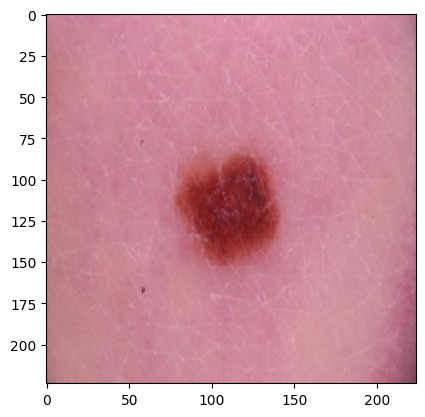

In [40]:
plt.imshow(images[0][0].astype('uint8'))

In [41]:
# 2 - Montar rede neural com modelo pré-treinado e extrair embeddings
base_model = keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)



In [42]:
# 3 - Criar dataframe com as colunas: nomes das imagens, vetores de embeddings e imagens
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.applications.xception.preprocess_input(inputs)
x = base_model(x)
features = tf.keras.layers.GlobalAveragePooling2D()(x)

# modelo
model_extract_features = tf.keras.Model(inputs, features)

In [43]:
embedings = model_extract_features.predict(images[0])

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step


In [44]:
features = embedings.reshape(len(embedings), -1)

In [45]:
pattern = r'[^\\]+$'
padrao = 'images\\\\(.*?).jpg'


doc_name = [re.search(padrao, string).group(1) for string in images[1]]

In [46]:
# Suponha que 'doc_name', 'features' e 'embedings' sejam suas variáveis
# Se 'features' e 'embedings' forem arrays 2D, você pode convertê-los em listas de arrays 1D
features_list = [feature.flatten() for feature in features]
embedings_list = [embeding.flatten() for embeding in embedings]

# Agora você pode criar o DataFrame sem erros
df = pd.DataFrame({'doc_name': doc_name, 'features': features_list, 'embedings': embedings_list})
df.head()

,doc_name,features,embedings
0,ISIC_0052212,"[0.00041341165, 0.0024675452, 0.0046993457, 0....","[0.00041341165, 0.0024675452, 0.0046993457, 0...."
1,ISIC_0075663,"[0.00017342443, 0.001938514, 0.006758905, 0.00...","[0.00017342443, 0.001938514, 0.006758905, 0.00..."
2,ISIC_0076545,"[0.00018148375, 0.0015940521, 0.005962924, 0.0...","[0.00018148375, 0.0015940521, 0.005962924, 0.0..."
3,ISIC_0076995,"[0.00025315073, 0.0028169432, 0.004712283, 0.0...","[0.00025315073, 0.0028169432, 0.004712283, 0.0..."
4,ISIC_0080752,"[0.00028580564, 0.0005617041, 0.007159463, 0.0...","[0.00028580564, 0.0005617041, 0.007159463, 0.0..."


In [47]:
# 4 - Com base em uma imagem de consulta, buscar e exibir 3 imagens mais similares e seus dados/informações estruturadas

## funcao de distancia a ser usada
def distance(x, y):
    return np.linalg.norm(x-y)

# nome da imagem para consulta
query_image = 'ISIC_0189694.jpg'

In [48]:
lista = []
for i in range(0, len(df.index)):
    lista.append(distance(df['embedings'][i], df['embedings'][24]))
df['distancias'] = lista

In [49]:
df.sort_values(by='distancias').head(4)

,doc_name,features,embedings,distancias
24,ISIC_0189694,"[0.00029041135, 0.0011356089, 0.0023838214, 0....","[0.00029041135, 0.0011356089, 0.0023838214, 0....",0.000000
22,ISIC_0172020,"[0.00013004018, 0.00011693928, 0.0041861697, 0...","[0.00013004018, 0.00011693928, 0.0041861697, 0...",12.491102
3,ISIC_0076995,"[0.00025315073, 0.0028169432, 0.004712283, 0.0...","[0.00025315073, 0.0028169432, 0.004712283, 0.0...",13.833380
8,ISIC_0085172,"[0.00012246535, 0.00028921972, 0.0037335556, 0...","[0.00012246535, 0.00028921972, 0.0037335556, 0...",13.879244


In [50]:
menores_distancias = ['ISIC_0172020', 'ISIC_0076995', 'ISIC_0085172']

dataset[dataset['image_name'].isin(menores_distancias)]

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,age_range
11,ISIC_0076995,IP_2235340,female,55.0,torso,nevus,benign,Mais de 55 anos
28,ISIC_0085172,IP_1705144,female,50.0,lower extremity,unknown,benign,45-55 anos
177,ISIC_0172020,IP_7330399,female,55.0,torso,unknown,benign,Mais de 55 anos


In [51]:
def show_images(imagens, labels, num_images=10):
    # Garante que o número de imagens a serem exibidas não excede o tamanho do conjunto de dados
    num_images = min(num_images, len(imagens))

    # Cria uma figura com subplots
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))

    # Exibe as imagens e seus rótulos correspondentes
    for i in range(num_images):
        axes[i].imshow(imagens[i].astype("uint8"))  # Converte para o tipo de dados uint8 para exibição correta
        axes[i].set_title(labels[i])
        axes[i].axis("off")

    plt.show()

In [52]:
menores_distancias

['ISIC_0172020', 'ISIC_0076995', 'ISIC_0085172']

In [58]:
menores_distancias = ['.\siim-isic_images\ISIC_0172020.jpg', '.\siim-isic_images\ISIC_0076995.jpg', '.\siim-isic_images\ISIC_0085172.jpg']
subarrays_filtrados = [subarray for subarray, nome in zip(images[0], images[1]) if nome in menores_distancias]
nomes_filtrados = [nome for nome in images[1] if nome in menores_distancias]

tupla_filtrada = (subarrays_filtrados, nomes_filtrados)

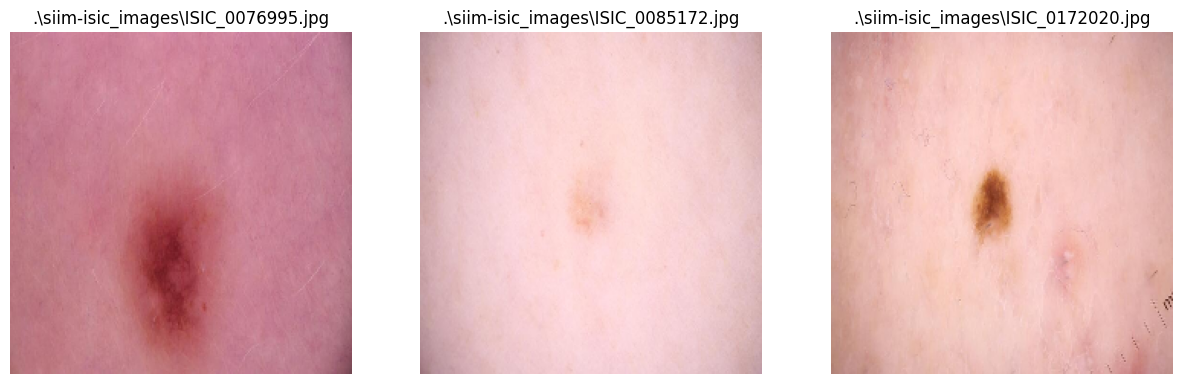

In [60]:
show_images(imagens=tupla_filtrada[0], labels=tupla_filtrada[1], num_images=3)

In [61]:
menores_distancias = ['ISIC_0172020', 'ISIC_0076995', 'ISIC_0085172']

dataset[dataset['image_name'].isin(menores_distancias)]

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,age_range
11,ISIC_0076995,IP_2235340,female,55.0,torso,nevus,benign,Mais de 55 anos
28,ISIC_0085172,IP_1705144,female,50.0,lower extremity,unknown,benign,45-55 anos
177,ISIC_0172020,IP_7330399,female,55.0,torso,unknown,benign,Mais de 55 anos
